### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [67]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import parameter

How to run:
- Change parameter

### 2. Dataset

In [74]:
import tensorflow_datasets as tfds

(ds_train, ds_validation), ds_info = tfds.load(
    parameter.DATASET,
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


ValueError: Image dimension should be 3. tfds.show_examples does not support batched examples or video.

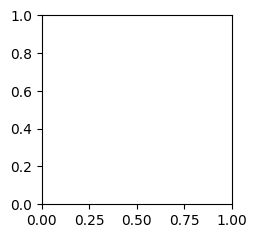

In [79]:
fig = tfds.show_examples(ds_train, ds_info)

In [77]:
normalize = tf.keras.Sequential([
    tf.keras.layers.Resizing(parameter.IMAGE_SIZE, parameter.IMAGE_SIZE),
    tf.keras.layers.Rescaling(scale=1./255)
])

augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation((-0.05,0.05)),
    tf.keras.layers.RandomTranslation((-0.1,0.1),(-0.1,0.1)),
    tf.keras.layers.RandomBrightness((-0.1, 0.1)),
    tf.keras.layers.RandomContrast((0.3, 0.3))
])

def prep(ds, shuffle=False, augment=False):
    ds = ds.map(lambda x, y: (normalize(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if shuffle:
        ds.shuffle(1000)

    ds = ds.batch(parameter.BATCH_SIZE)

    if augment:
        ds = ds.map(lambda x, y: (augmentation(x, training=True), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    return ds.prefetch(tf.data.experimental.AUTOTUNE)

In [78]:
ds_train = prep(ds_train, shuffle=True, augment=True)
ds_validation = prep(ds_validation)

### 3. Training and Hyperparameter tuning

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import tensorflow_datasets as tfds

import Models.CNN_Model_2

model = Models.CNN_Model_2.Model(parameter.numclasses)


In [18]:
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=20,
    verbose=2,
)

148/148 - 1955s - loss: 1.5703 - accuracy: 0.4242 - val_loss: 0.9695 - val_accuracy: 0.7424 - 1955s/epoch - 13s/step


### 4. Test

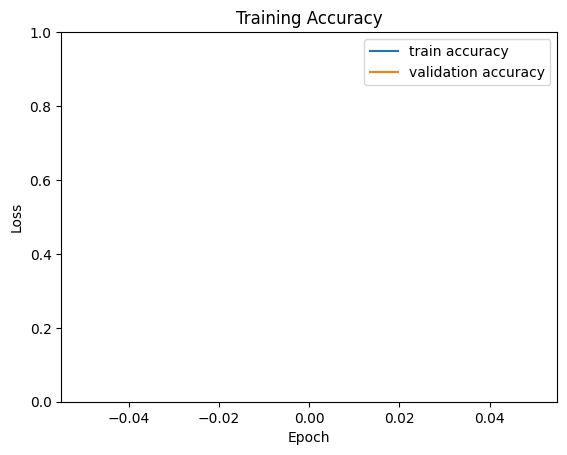

In [19]:
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.savefig(fname=f'{model.model.name}_{parameter.CONV_DO_RATE}-{parameter.LINEAR_DO_RATE}-{parameter.LEARNING_RATE}.png')
plt.show()


In [29]:
with open(f"result {parameter.DATASET}.txt", 'a') as f:
    f.write(f'{model.model.name}_{parameter.CONV_DO_RATE}-{parameter.LINEAR_DO_RATE}-{parameter.LEARNING_RATE}')
    f.write(str(history.history))
    f.write('\n')

### 5. Evaluate models

In [ ]:
model.evaluate(ds_validation)